# Grid Searc SVC 3

Explorando `GridSearchCV` para diferentes valores de `gamma`.

## Importando bibliotecas

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

## Carregando dados

In [2]:
# Carregando DataFrame
chainDF = pd.read_csv('./corrente.csv')

targetS = chainDF.pop('classe')

# Carregando Rótulos das características
feature_names = chainDF.columns

# Carregando rótulos das classes
target_names = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Definindo variáveis
X, y = chainDF.to_numpy(), targetS.to_numpy()

# Separando dados
X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pré-processando dados
sc = StandardScaler().fit(X_pre_train)

X_train = sc.transform(X_pre_train)
X_test = sc.transform(X_pre_test)

## Realizando busca em grade

In [5]:
gammaGrid = ['scale', 'auto'] + [1/(2 ** gamma) for gamma in np.arange(0, 10)]

gammaGS = GridSearchCV(
    estimator=SVC(),
    cv=15,
    param_grid={
        'gamma':gammaGrid,
        'decision_function_shape':['ovo'],
        'cache_size':[1000]}
).fit(
    X_train,
    y_train
)

gammaDF = pd.DataFrame(gammaGS.cv_results_)
gammaDF[['param_gamma', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_gamma,mean_test_score,std_test_score,rank_test_score
3,0.5,0.674528,0.015716,1
4,0.25,0.664844,0.018646,2
2,1,0.654416,0.018403,3
5,0.125,0.631387,0.014764,4
6,0.0625,0.562085,0.019287,5
7,0.03125,0.474862,0.021084,6
1,auto,0.457137,0.020325,7
0,scale,0.456040,0.020287,8
8,0.015625,0.412331,0.018347,9
9,0.0078125,0.354741,0.017655,10


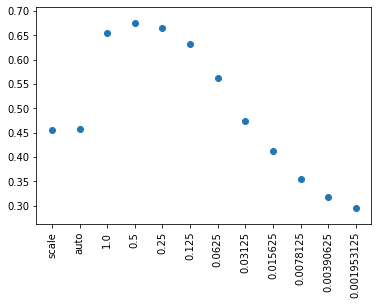

In [22]:
plt.xticks(rotation='vertical')
plt.scatter(x=np.array(gammaGrid), y=gammaDF[['mean_test_score']])

In [23]:
gamma2GS = GridSearchCV(
    estimator=SVC(),
    cv=15,
    param_grid={
        'gamma':np.linspace(0.25, 1),
        'decision_function_shape':['ovo'],
        'cache_size':[1000]}
).fit(
    X_train,
    y_train
)

gamma2DF = pd.DataFrame(gamma2GS.cv_results_)
gamma2DF[['param_gamma', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_gamma,mean_test_score,std_test_score,rank_test_score
17,0.510204,0.675076,0.015990,1
20,0.556122,0.674532,0.017853,2
14,0.464286,0.674345,0.015042,3
18,0.52551,0.673981,0.016805,4
15,0.479592,0.673979,0.014400,5
21,0.571429,0.673619,0.018900,6
19,0.540816,0.673616,0.017553,7
16,0.494898,0.673613,0.015404,8
12,0.433673,0.673430,0.015107,9
22,0.586735,0.673253,0.018800,10


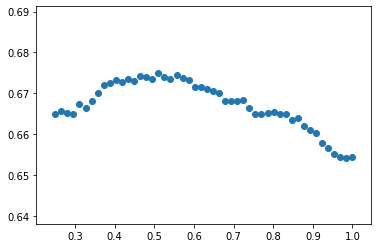

In [24]:
plt.scatter(x=np.linspace(0.25, 1), y=gamma2DF[['mean_test_score']])